In [64]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_hex
import folium
import numpy as np

In [39]:
# IQ Average for all the cities in Türkiye
data = {
    'city': ['Bingol', 'Siirt', 'Hakkari', 'Artvin', 'Kars', 'Bitlis', 'Agri', 'Duzce', 'Igdir', 'Amasya', 'Erzincan', 'Bilecik', 'Adiyaman', 'Ardahan', 'Hatay', 'Cankiri', 'Mus', 'Van', 'Yozgat', 'Sanliurfa', 'Bayburt', 'Sirnak', 'Elazig', 'Batman', 'Adana', 'Erzurum', 'Manisa', 'Tokat', 'Kilis', 'Diyarbakir', 'Maras', 'Mardin', 'Gaziantep', 'Ordu', 'Nigde', 'Aksaray', 'Malatya', 'Kastamonu', 'Nevsehir', 'Isparta', 'Sivas', 'Burdur', 'Afyon', 'Gumushane', 'Sinop', 'Aydin', 'Osmaniye', 'Kirikkale', 'Giresun', 'Mersin', 'Karabuk', 'Samsun', 'Corum', 'Bolu', 'Tunceli', 'Edirne', 'Kayseri', 'Kutahya', 'Kirsehir', 'Sakarya', 'Bartin', 'Denizli', 'Rize', 'Konya', 'Usak', 'Karaman', 'Yalova', 'Zonguldak', 'Tekirdag', 'Antalya', 'Trabzon', 'Kirklareli', 'Bursa', 'Balikesir', 'Kocaeli', 'Istanbul', 'Canakkale', 'Mugla', 'Izmir', 'Ankara', 'Eskisehir'],
    'iq': [94.19, 94.52, 95.16, 95.36, 95.84, 95.96, 96.06, 96.26, 96.69, 96.88, 96.97, 97.14, 97.29, 97.33, 97.36, 97.53, 97.73, 97.74, 98.05, 98.07, 98.29, 98.43, 98.46, 98.75, 98.76, 98.97, 99.06, 99.09, 99.14, 99.19, 99.28, 99.32, 99.40, 99.58, 99.60, 99.63, 99.75, 99.98, 100.01, 100.06, 100.09, 100.15, 100.17, 100.24, 100.29, 100.34, 100.39, 100.46, 100.56, 100.71, 100.85, 100.87, 100.95, 100.99, 101.17, 101.28, 101.42, 101.65, 101.74, 101.78, 102.13, 102.14, 102.32, 102.36, 102.37, 102.52, 102.58, 102.68, 102.82, 103.29, 103.37, 103.38, 103.47, 103.59, 103.85, 104.02, 104.02, 104.12, 104.51, 104.91, 105.20]
}

# Convert the data into a DataFrame
iq_df = pd.DataFrame(data)


In [31]:
# Load the shapefile (path to the shapefile should be provided)
turkish_cities = gpd.read_file("C:\\Users\\soner\\PycharmProjects\\Jupyter Notebooks\\gadm36_TUR_1.shp")

In [32]:
print("Columns in turkish_cities GeoDataFrame:", turkish_cities.columns)
print("Columns in iq_df DataFrame:", iq_df.columns)

Columns in turkish_cities GeoDataFrame: Index(['NAME_1', 'alan', 'geometry'], dtype='object')
Columns in iq_df DataFrame: Index(['city', 'iq'], dtype='object')


In [33]:
print(turkish_cities["NAME_1"])

0         Adana
1      Adiyaman
2         Afyon
3          Agri
4       Aksaray
        ...    
76         Usak
77          Van
78       Yalova
79       Yozgat
80    Zonguldak
Name: NAME_1, Length: 81, dtype: object


In [40]:
# Merge the data
merged_data = turkish_cities.merge(iq_df, left_on='NAME_1', right_on='city')

In [54]:
# Convert merged GeoDataFrame to GeoJSON format
geojson_data = merged_data.to_crs(epsg=4326).to_json()

In [46]:
# Define colors for the minimum and maximum values
min_color = 'red'
mid_color = 'yellow'
max_color = 'green'

# Create a custom color map
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_cmap',
    [min_color, mid_color, max_color]
)

In [57]:
# Define the minimum and maximum IQ values from the data
iq_min = merged_data['iq'].min()
iq_max = merged_data['iq'].max()

In [65]:
def iq_to_color(iq, iq_min, iq_max, cmap):
    # Normalize IQ value to a range between 0 and 1
    norm_iq = (iq - iq_min) / (iq_max - iq_min)
    
    # Use the color map to find the corresponding color
    color = cmap(norm_iq)
    
    # Convert the color to hex format
    return to_hex(color)


In [66]:
# Define the style function for the GeoJson layer
def style_function(feature):
    iq_value = feature['properties']['iq']
    color = iq_to_color(iq_value, iq_min, iq_max, custom_cmap)
    
    return {
        'fillColor': color,
        'color': 'black',     # Edge color
        'weight': 1,
        'fillOpacity': 0.6
    }

In [68]:
# Create a folium map centered on Turkey
map_turkey = folium.Map(location=[38.9637, 35.2433], zoom_start=5)

# Add the GeoJson layer to the map
folium.GeoJson(
    geojson_data,
    name='Average IQ',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME_1', 'iq'],  # Replace 'name_column' with the correct column name
        aliases=['City:', 'IQ:'],
        localize=True,
        sticky=False
    )
).add_to(map_turkey)

# Add a layer control
folium.LayerControl().add_to(map_turkey)

# Display the map
map_turkey


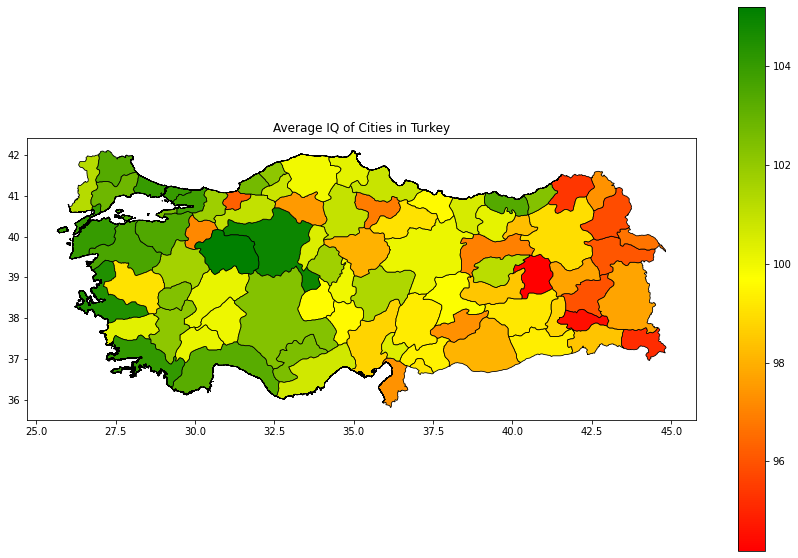

In [47]:
# Plot the data
fig, ax = plt.subplots(figsize=(15, 10))

# Use the custom color map to plot the data
merged_data.plot(column='iq', cmap=custom_cmap, linewidth=0.8, ax=ax, edgecolor='black', legend=True)

# Set title and other plot properties
ax.set_title('Average IQ of Cities in Turkey')

# Display the plot
plt.show()


In [50]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)

# Display the DataFrame
iq_df

city      iq
0       Bingol   94.19
1        Siirt   94.52
2      Hakkari   95.16
3       Artvin   95.36
4         Kars   95.84
5       Bitlis   95.96
6         Agri   96.06
7        Duzce   96.26
8        Igdir   96.69
9       Amasya   96.88
10    Erzincan   96.97
11     Bilecik   97.14
12    Adiyaman   97.29
13     Ardahan   97.33
14       Hatay   97.36
15     Cankiri   97.53
16         Mus   97.73
17         Van   97.74
18      Yozgat   98.05
19   Sanliurfa   98.07
20     Bayburt   98.29
21      Sirnak   98.43
22      Elazig   98.46
23      Batman   98.75
24       Adana   98.76
25     Erzurum   98.97
26      Manisa   99.06
27       Tokat   99.09
28       Kilis   99.14
29  Diyarbakir   99.19
30       Maras   99.28
31      Mardin   99.32
32   Gaziantep   99.40
33        Ordu   99.58
34       Nigde   99.60
35     Aksaray   99.63
36     Malatya   99.75
37   Kastamonu   99.98
38    Nevsehir  100.01
39     Isparta  100.06
40       Sivas  100.09
41      Burdur  100.15
42       Afyon  100.17
43   Gumushane  100.24
44       Sinop  100.29
45       Aydin  100.34
46    Osmaniye  100.39
47   Kirikkale  100.46
48     Giresun  100.56
49      Mersin  100.71
50     Karabuk  100.85
51      Samsun  100.87
52       Corum  100.95
53        Bolu  100.99
54     Tunceli  101.17
55      Edirne  101.28
56     Kayseri  101.42
57     Kutahya  101.65
58    Kirsehir  101.74
59     Sakarya  101.78
60      Bartin  102.13
61     Denizli  102.14
62        Rize  102.32
63       Konya  102.36
64        Usak  102.37
65     Karaman  102.52
66      Yalova  102.58
67   Zonguldak  102.68
68    Tekirdag  102.82
69     Antalya  103.29
70     Trabzon  103.37
71  Kirklareli  103.38
72       Bursa  103.47
73   Balikesir  103.59
74     Kocaeli  103.85
75    Istanbul  104.02
76   Canakkale  104.02
77       Mugla  104.12
78       Izmir  104.51
79      Ankara  104.91
80   Eskisehir  105.20